# Customer Shopping Dataset

## Import all the necessary libraries

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphics
import seaborn as sns # graphics too
import datetime as dt # for date type analysis 
import plotly.graph_objects as go # graphics
import nbformat # jupyter notebook schema
import calendar # handle dates
import pyreadr # Handle some excel files
import xlrd # Read data in the historical .xls

## Set the graphs style with pyplot

In [45]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (7, 6)

## Import the data

In [46]:
dataset = pd.read_csv('customer_shopping_data.csv')
dataset.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
78534,I297354,C271039,Female,45,Clothing,5,1500.40,Cash,3/7/2021,Metrocity
71649,I171493,C136019,Female,43,Clothing,3,900.24,Credit Card,12/11/2022,Metropol AVM
66926,I129787,C584634,Female,35,Clothing,1,300.08,Credit Card,23/02/2021,Zorlu Center
11904,I242782,C112969,Female,31,Toys,5,179.20,Credit Card,5/10/2021,Metrocity
7571,I351506,C298479,Male,29,Shoes,1,600.17,Credit Card,25/04/2021,Forum Istanbul


## Raw insights

In [47]:
# Create a copy of the dataset, so if I make a mistake, 
# I can always go back to the original.

df = dataset.copy()
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [49]:
# Check for Nan values across all columns.

df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [50]:
# Parsing the dates

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)

print(df.dtypes)

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object


In [51]:
# Create a sales column

df['sales'] = df['quantity'] * df['price'] 
df['sales']

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: sales, Length: 99457, dtype: float64

In [52]:
# Create a quarter column.

df['quarter'] = pd.PeriodIndex(df['invoice_date'], freq = 'Q')
df['quarter'] = df['quarter'].astype('string')

In [53]:
# Create a month column.

df['month'] = df['invoice_date'].dt.month
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,quarter,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022Q3,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021Q4,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021Q4,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021Q2,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021Q4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022Q3,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021Q3,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021Q1,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,2021Q1,3


In [54]:
# These columns are associated as a unique value per transaction, it doesn't actually give me useful information.

df = df.drop(['invoice_no', 'customer_id'], axis=1)
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,quarter,month
0,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022Q3,8
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021Q4,12
2,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021Q4,11
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021Q2,5
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021Q4,10


In [55]:
# I will use this dictionary when I analyze the data by time.

month_dict = {i+1: calendar.month_name[i+1] for i in range(12)}

numerical_months = list(month_dict.keys())
string_months = list(month_dict.values())

string_months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

# Sales

##  By age

In [56]:
def age_distribution(age):
    if age < 20:
        return '18-20'
    elif age < 30:
        return '20-30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    else:
        return '65+'
    
df['age_distribution'] = df['age'].apply(age_distribution)
pyramid = df[['age_distribution', 'gender', 'age']]
pyramid.head()


,age_distribution,gender,age
0,20-30,Female,28
1,20-30,Male,21
2,20-30,Male,20
3,65+,Female,66
4,50-60,Female,53


In [57]:
pyramid_age = pd.pivot_table(
    data = pyramid,
    index = pyramid['age_distribution'],
    columns = 'gender',
    values = 'age',
    aggfunc = 'count'
) 

pyramid_age = pyramid_age.reset_index()
pyramid_age

gender,age_distribution,Female,Male
0,18-20,2212,1568
1,20-30,11515,7748
2,30-40,11522,7765
3,40-50,11518,7635
4,50-60,11311,7620
5,65+,11404,7639


In [58]:
y_age = pyramid_age['age_distribution']
x_M = pyramid_age['Male']
x_F = pyramid_age['Female'] * -1

# Creating instance of the figure
fig = go.Figure()

# Adding Male data to the figure
fig.add_trace(go.Bar(y= y_age, x = x_M, 
                     name = 'Male', 
                     orientation = 'h'))

# Adding Female data to the figure
fig.add_trace(go.Bar(y = y_age, x = x_F,
                     name = 'Female', orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(
    title = 'Population Distribution on our Sales',
    title_font_size = 22, barmode = 'relative',
    bargap = 0.0, bargroupgap = 0,
    xaxis = dict(tickvals = [-10000, -5000, -1000,
                             0, 1000, 3000, 6000],
                                
    ticktext = ['10K', '5K', '1K', '0', 
                '1K', '3K', '6K'],
                                
    title = 'Population in Thousands',
    title_font_size = 14),
    
    legend=dict(bgcolor = 'white', font = dict(color='black')
    )
)

fig.update_layout(template = 'seaborn')

fig.show()

## By gender

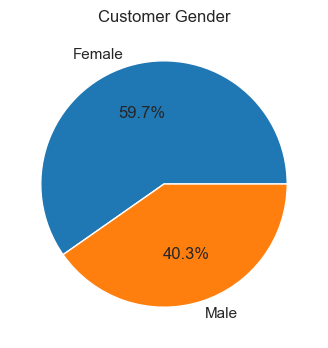

In [59]:
plt.figure(figsize = (4,4))
plt.title('Customer Gender')

(
    df
    .groupby('gender')
    .sum(numeric_only = True)
    .sort_values(ascending = False, by = 'sales')
    .pipe(
        lambda df:
        plt.pie(
            x = df['sales'],
            labels = df.index,
            autopct = '%1.1f%%'
        )
    )
)

plt.show()

## Shopping mall

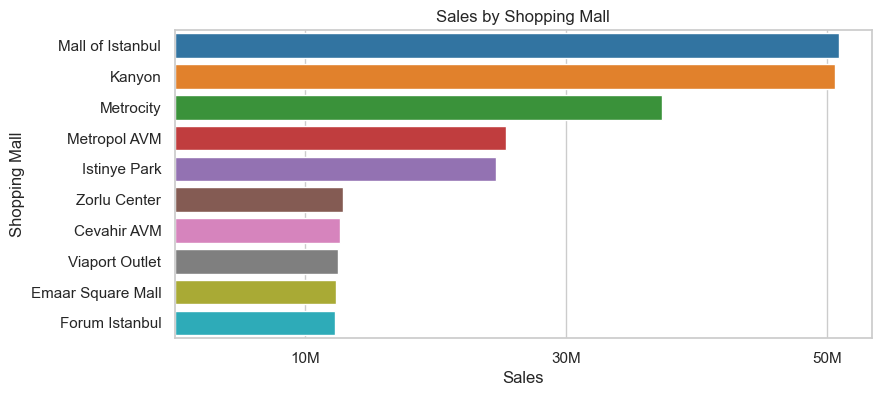

In [60]:
plt.figure(figsize = (9,4))
plt.title('Sales by Shopping Mall')

(
    df
    .groupby('shopping_mall')
    .sum(numeric_only = True)
    .sort_values(ascending = False, by = 'sales')
    .pipe(
        lambda df:
        sns.barplot(
            x = df['sales'],
            y = df.index,
            orient = 'h'
        )
    )
)

plt.ylabel('Shopping Mall')
plt.xlabel('Sales')
plt.xticks([10000000, 30000000, 50000000], ['10M', '30M', '50M'])

plt.show()

## Paymenth method

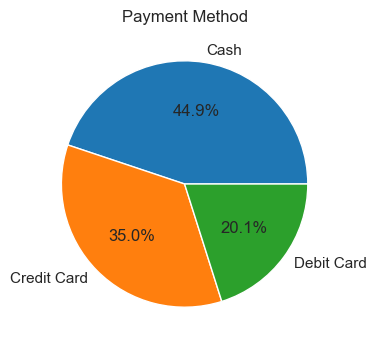

In [61]:
plt.figure(figsize = (4,4))
plt.title('Payment Method')

(
    df
    .groupby('payment_method')
    .sum(numeric_only = True)
    .sort_values(ascending = False, by = 'sales')
    .pipe(
        lambda df:
        plt.pie(
            x = df['sales'],
            labels = df.index,
            autopct = '%1.1f%%'
        )
    )
)

plt.show()

## Category

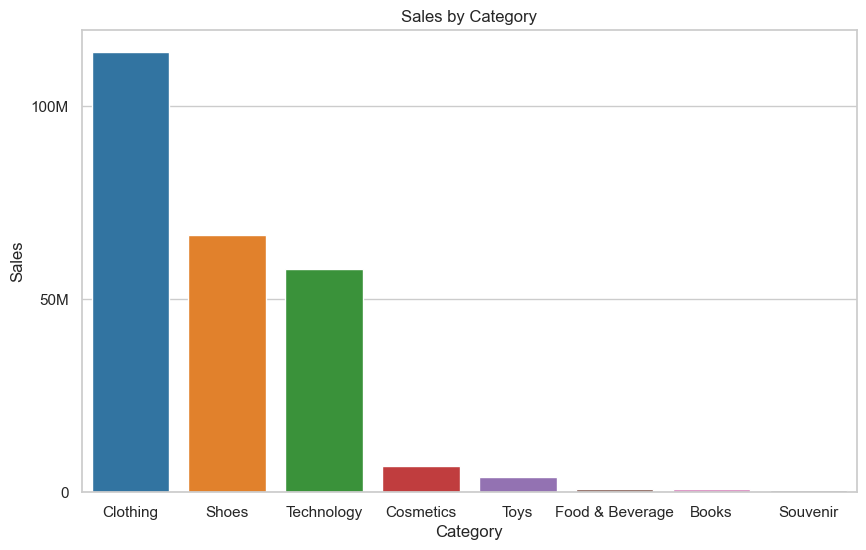

In [62]:
plt.figure(figsize = (10,6))
plt.title('Sales by Category')

(
    df
    .groupby('category')
    .sum(numeric_only =  True)
    .sort_values(ascending = False, by = 'sales')
    .pipe(
        lambda df:
            sns.barplot(
                data = df,
                x = df.index,
                y = df['sales']
            )
        )
)

plt.ylabel('Sales')
plt.xlabel('Category')
plt.yticks([0,50000000,100000000], ['0', '50M', '100M'])

plt.show()

## Time

In [63]:
# There's data for this year 2023, I want to analyze trends over months and quarters,
# since this year hasn't ended yet, I will ignore this data and only work with the other two years that are complete.

data_without_2023 = df.loc[df['invoice_date'] < '2023-01-01']

### Quarters

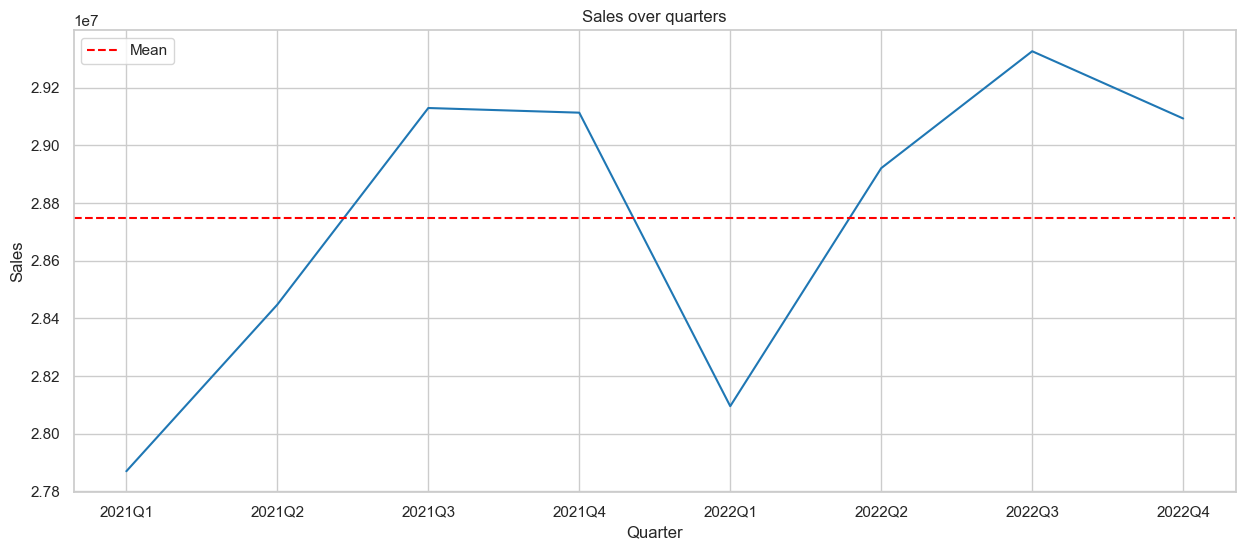

In [64]:
plt.figure(figsize = (15,6))
plt.title('Sales over quarters')

quarter_pivot_table = pd.pivot_table(
    data = data_without_2023,
    index = data_without_2023['quarter'],
    values = 'sales',
    aggfunc = 'sum'
)

ax = sns.lineplot(
    data = quarter_pivot_table,
    x = quarter_pivot_table.index,
    y = 'sales'
)

ax.axhline(y = quarter_pivot_table['sales'].mean(), color = 'red', linestyle = 'dashed', label = 'Mean')
plt.legend(loc = 'upper left')
plt.ylabel('Sales')
plt.xlabel('Quarter')

plt.show()

### Months

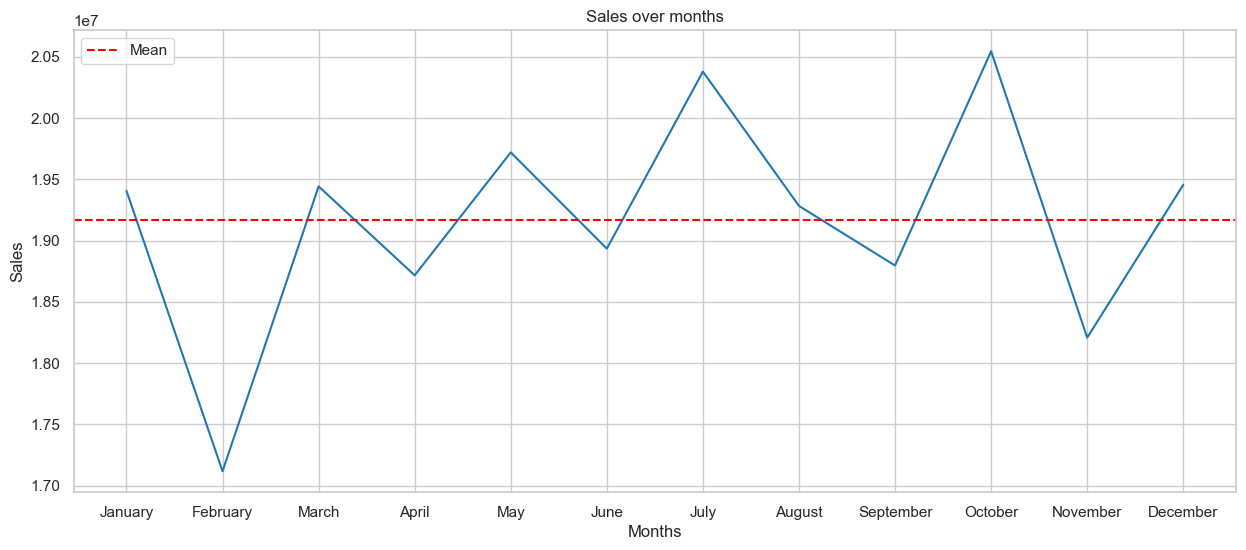

In [65]:
plt.figure(figsize = (15,6))
plt.title('Sales over months')

month_pivot_table = pd.pivot_table(
    data = data_without_2023,
    index = data_without_2023['month'],
    values = 'sales',
    aggfunc = 'sum'
)

ax = sns.lineplot(
    data = month_pivot_table,
    x = month_pivot_table.index,
    y = 'sales'
)

ax.axhline(y = month_pivot_table['sales'].mean(), color = 'red', linestyle = 'dashed', label = 'Mean')

plt.legend(loc = 'upper left')
plt.ylabel('Sales')
plt.xlabel('Months')
plt.xticks(numerical_months, string_months)

plt.show()